In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [172]:
f4 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/CC_2019.csv")

In [173]:
f4['Date'] = pd.to_datetime(f4['Date'])

In [174]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [175]:
f4

,Date,CC
0,2019-03-26,0.000200
1,2019-03-27,0.002267
2,2019-03-28,0.004333
3,2019-03-29,0.006400
4,2019-03-30,0.008467
...,...,...
111,2019-07-15,81.008000
112,2019-07-16,78.556000
113,2019-07-17,76.104000
114,2019-07-18,73.652000


In [176]:
data2 = f4.copy()

In [177]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [178]:
data2.drop(['Date'], axis = 1,inplace = True)

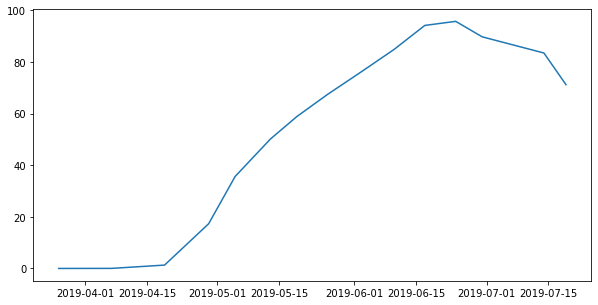

In [179]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['CC'])

In [180]:
ad_fuller_result = adfuller(data2['CC'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.0782880343739802
p-value: 0.25333422885261947


In [181]:
data2['CC'] = np.log(data2['CC'])
data2['CC_log_diff'] = data2['CC'] - data2['CC'].shift(1)

In [182]:
data2 = data2.dropna()

In [183]:
ad_fuller_result = adfuller(data2['CC_log_diff'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.544258447027843
p-value: 9.183072675050473e-09


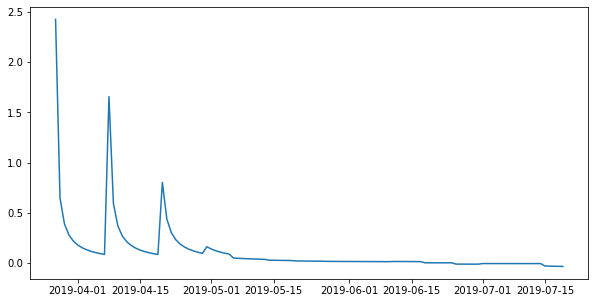

In [184]:
plt.plot(data2['CC_log_diff'])

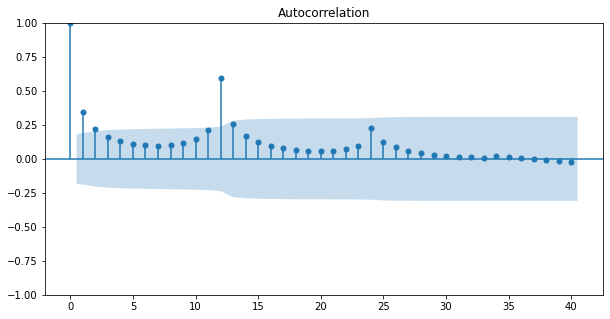

In [185]:
sm.graphics.tsa.plot_acf(data2['CC_log_diff'].values.squeeze(), lags=40)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


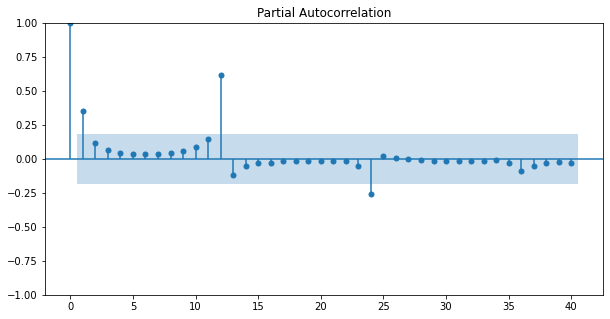

In [186]:
sm.graphics.tsa.plot_pacf(data2['CC_log_diff'].values.squeeze(), lags=40)
plt.show()

In [187]:
# p can be 1
# q value can be 2
# D value can be 1

In [188]:
train_data = data2[:50]
train_data_1 = train_data['CC']
train_data_1

Date
2019-03-27   -6.089445
2019-03-28   -5.441418
2019-03-29   -5.051457
2019-03-30   -4.771618
2019-03-31   -4.553210
2019-04-01   -4.374058
2019-04-02   -4.222178
2019-04-03   -4.090353
2019-04-04   -3.973898
2019-04-05   -3.869602
2019-04-06   -3.775164
2019-04-07   -3.688879
2019-04-08   -2.030651
2019-04-09   -1.437588
2019-04-10   -1.067841
2019-04-11   -0.798508
2019-04-12   -0.586537
2019-04-13   -0.411735
2019-04-14   -0.262989
2019-04-15   -0.133531
2019-04-16   -0.018928
2019-04-17    0.083881
2019-04-18    0.177100
2019-04-19    0.262364
2019-04-20    1.065400
2019-04-21    1.504966
2019-04-22    1.809272
2019-04-23    2.042259
2019-04-24    2.231089
2019-04-25    2.389863
2019-04-26    2.526848
2019-04-27    2.647309
2019-04-28    2.754807
2019-04-29    2.851862
2019-04-30    3.014145
2019-05-01    3.153733
2019-05-02    3.276201
2019-05-03    3.385294
2019-05-04    3.483647
2019-05-05    3.573188
2019-05-06    3.622840
2019-05-07    3.670143
2019-05-08    3.715308
2019-0

In [189]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_1, order = (12,1,12))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [190]:
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     CC   No. Observations:                   50
Model:               ARIMA(12, 1, 12)   Log Likelihood              -26253.723
Date:                Wed, 03 Aug 2022   AIC                          52557.446
Time:                        12:35:15   BIC                          52604.742
Sample:                    03-27-2019   HQIC                         52575.390
                         - 05-15-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1169      0.056      2.076      0.038       0.007       0.227
ar.L2          0.7114      0.046     15.305      0.000       0.620       0.803
ar.L3          0.6809      0.067     10.149      0.0

<AxesSubplot:xlabel='Date'>

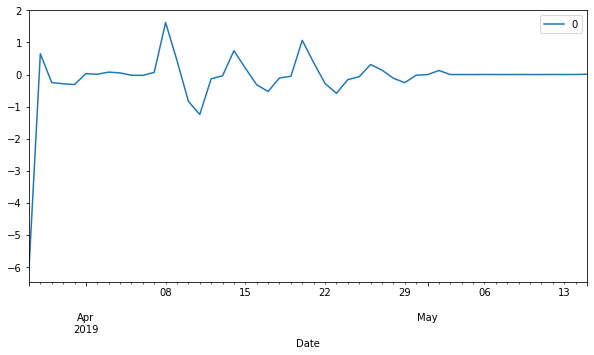

In [191]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

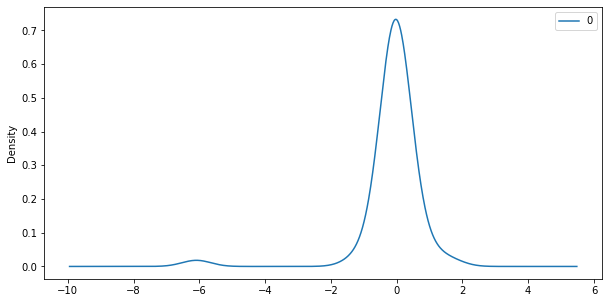

In [192]:
residuals.plot(kind='kde')

In [193]:
residuals.describe()

,0
count,50.000000
mean,-0.116475
std,0.959428
min,-6.089445
25%,-0.128246
50%,-0.000061
75%,0.044929
max,1.622362


In [199]:
test_data = data2[50:60]
test_data_1 = test_data['CC']
test_data_1

Date
2019-05-16    3.998109
2019-05-17    4.024399
2019-05-18    4.050015
2019-05-19    4.074992
2019-05-20    4.095725
2019-05-21    4.116036
2019-05-22    4.135943
2019-05-23    4.155462
2019-05-24    4.174607
2019-05-25    4.193392
2019-05-26    4.211831
2019-05-27    4.228626
2019-05-28    4.245143
2019-05-29    4.261391
2019-05-30    4.277380
2019-05-31    4.293117
2019-06-01    4.308611
2019-06-02    4.323868
2019-06-03    4.339184
2019-06-04    4.354270
Name: CC, dtype: float64

In [200]:
model_pred = model_fit.forecast(steps = 10)
model_pred

2019-05-16    3.986461
2019-05-17    3.997195
2019-05-18    4.009438
2019-05-19    4.011290
2019-05-20    4.016215
2019-05-21    4.016928
2019-05-22    4.016554
2019-05-23    4.017157
2019-05-24    4.010780
2019-05-25    4.005178
2019-05-26    3.995965
2019-05-27    3.982473
2019-05-28    3.969115
2019-05-29    3.951455
2019-05-30    3.932827
2019-05-31    3.914387
2019-06-01    3.892228
2019-06-02    3.871283
2019-06-03    3.848173
2019-06-04    3.823024
Freq: D, Name: predicted_mean, dtype: float64

In [201]:
from sklearn.metrics import mean_squared_error
from math import sqrt
model_pred_1 = np.exp(model_pred)
test_data_2 = np.exp(test_data_1)
print (model_pred_1)
print (test_data_2)
rmse = sqrt(mean_squared_error(test_data_2, model_pred_1))
print('Test RMSE: %.3f' % rmse)

2019-05-16    53.863917
2019-05-17    54.445224
2019-05-18    55.115873
2019-05-19    55.218061
2019-05-20    55.490671
2019-05-21    55.530247
2019-05-22    55.509477
2019-05-23    55.542958
2019-05-24    55.189878
2019-05-25    54.881604
2019-05-26    54.378309
2019-05-27    53.649562
2019-05-28    52.937638
2019-05-29    52.010998
2019-05-30    51.051119
2019-05-31    50.118360
2019-06-01    49.019985
2019-06-02    48.003941
2019-06-03    46.907268
2019-06-04    45.742331
Freq: D, Name: predicted_mean, dtype: float64
Date
2019-05-16    54.495000
2019-05-17    55.946667
2019-05-18    57.398333
2019-05-19    58.850000
2019-05-20    60.082857
2019-05-21    61.315714
2019-05-22    62.548571
2019-05-23    63.781429
2019-05-24    65.014286
2019-05-25    66.247143
2019-05-26    67.480000
2019-05-27    68.622857
2019-05-28    69.765714
2019-05-29    70.908571
2019-05-30    72.051429
2019-05-31    73.194286
2019-06-01    74.337143
2019-06-02    75.480000
2019-06-03    76.645000
2019-06-04   